## Analysis from Friday

In [89]:
import numpy as np
import pandas as pd
import scanpy as sc
# making CN profiles

# columns is cell type (2 cell types)

cn_profiles = [ [1,0],
                [1,1], 
                [0,1] ] # all unique vectors

# need to create cells ourselves, 10 cells, 2 cell types
cell_type_1  = np.random.randn(5,3) # 5 of cell type1
# choose 3 of these to be sub cell type 1, 2 to be 2

cell_type_2 = np.random.randn(5,3) # 5 of cell type2
# choose 2 to be 1, 3 to be 2


# two sub_cell_types

# how did we know length of sub_cell_type_1 is 5
# ans: each cell has a sub cell type

# these are 5 cells and corresponding sub cell types
# boolean choice, boolean mask
sub_cell_type_1 = [ 1,1,1,2,2 ] # randomly assign subcell type to cells, already have thi

# choose all of the cells from cell type 1 
sub_cell_type_1_dict = {(1,0):1 ,(1,1):2}
# for sub_cell_type_1
# different cell type for each cell neighborhood
# 1 is [1,0], 2 is [1,1]
sub_cell_type_2 = [ 1,2,1,2,2 ]
# 1 is [1,0], 2 is [1,1]
sub_cell_type_2_dict = {(0,1):1 ,(1,1):2}


In [90]:
print(sub_cell_type_1_dict[(1,0)])

1


In [91]:
cell_type_1_df = pd.DataFrame(cell_type_1)
cell_type_1_df['subcluster'] = sub_cell_type_1

In [92]:
cell_type_2_df = pd.DataFrame(cell_type_2)
cell_type_2_df['subcluster'] = sub_cell_type_2

In [93]:
cell_type_2_df

,0,1,2,subcluster
0,-0.331797,-0.442782,1.220304,1
1,-2.382772,-0.913277,0.977000,2
2,1.405632,-3.150592,-0.167589,1
3,1.872119,1.097289,-0.209268,2
4,-0.498987,-1.546342,0.371029,2


In [94]:
spots = [] # append every time
cn_choice = []
for i in range(10):
    random_choice = np.random.randint(0,3)
    choice = tuple(cn_profiles[random_choice])
    
    # if random_choice in sub_cell_type_1_dict:

    # after sampling cn_profile, map to sub_cell_type


    # cn_choice.append(choice)
    # this above chooses random cell neighbhorhood
    # creating spots
    # final_gene_profile = []
    
    # make change to for loop
    # need both cell type and cell sub type
    # print(choice)
    for cell_type_index,count_cell_type in enumerate(choice):
        # print("this is celltype")
        if count_cell_type == 0:
            continue
        if cell_type_index == 0:
            sub_cluster = sub_cell_type_1_dict[choice] # should be 1 or 2
            partition = cell_type_1_df[cell_type_1_df['subcluster'] == sub_cluster]
            rand_choice = np.random.randint(0,len(partition))
            final_gene_profile = partition.iloc[rand_choice,:-1] # don't want the subcluster column

            # check what the sub-type of the cell is 
            # need to change this
            # function that selects from a list randomly
            # how to create this list 
            # rand_choice = np.random.randint(0,len(cell_type_1),size=count_cell_type)
            
            # final_gene_profile.append(cell_type_1[rand_choice,:])
        if cell_type_index == 1:
            sub_cluster = sub_cell_type_2_dict[choice]
            partition = cell_type_2_df[cell_type_2_df['subcluster'] == sub_cluster]
            rand_choice = np.random.randint(0,len(partition))
            # choosing random value in cell type 2
            # rand_choice = np.random.randint(0,len(cell_type_2),size=count_cell_type)

            # print(list(partition.iloc[rand_choice,:-1]))
            final_gene_profile = partition.iloc[rand_choice,:-1]
            # final_gene_profile = cell_type_2[rand_choice,:]

        # print(final_gene_profile)
    
    # spots.append(final_gene_profile)


        
    


In [95]:
print(cn_choice) # for each spot we want the count of all the cells in the spot
# each cell is a major cell type, also has a subtype
# vectors to represent subtypes

# place each subtype in a different cell neighborhood profile

print(spots)

[]
[]


In [96]:
# only want expression values associated with correct cell type and subcell type
# dictionary with [0,1], [1,1], [1,0] keys and values as their corresponding gene expressions
# then 
# how do I map to sub_cell_type1
# what does cn_choice and spot mean?
# spot is the cell and its gene expression that is placed there. it is randomly chosen from cell_type_x
# cn_choice is the cell neighborhood (proportion of cell type)
# what is sub_cell_type1: the sub_cell_types of each cell in major cell type
# aim is for our spots to have spatial information not be randomly placed


cell_type_1.shape

(5, 3)

## Generating Synthetic Data from Real Dataset Now

In [97]:
adata_count_matrix = sc.read_mtx("/Users/nicholasdjedjos/Documents/stat_ml_for_genomics/Mapping-scRNA-seq-Variability-Using-Co-Embedding-to-Understand-Cell-Neighborhood-Effects/starfysh_reproducibility-main/data/CID44971_TNBC/scrna/count_matrix_sparse.mtx")

In [98]:
adata_count_matrix_meta = pd.read_csv("/Users/nicholasdjedjos/Documents/stat_ml_for_genomics/Mapping-scRNA-seq-Variability-Using-Co-Embedding-to-Understand-Cell-Neighborhood-Effects/starfysh_reproducibility-main/data/CID44971_TNBC/scrna/metadata_sf.csv")

In [99]:
adata_count_matrix_t = adata_count_matrix.transpose()

In [100]:
adata_count_matrix_t.obs['celltype_major'] = pd.Categorical(adata_count_matrix_meta['celltype_major'])
adata_count_matrix_t.obs['celltype_minor'] = pd.Categorical(adata_count_matrix_meta['celltype_minor'])
adata_count_matrix_t.obs['celltype_subset'] = pd.Categorical(adata_count_matrix_meta['celltype_subset'])
adata_count_matrix_t.obs['subtype'] = pd.Categorical(adata_count_matrix_meta['subtype'])

In [101]:
sc.pp.neighbors(adata_count_matrix_t)
sc.tl.umap(adata_count_matrix_t)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/nicholasdjedjos/miniconda3/envs/maxfuse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


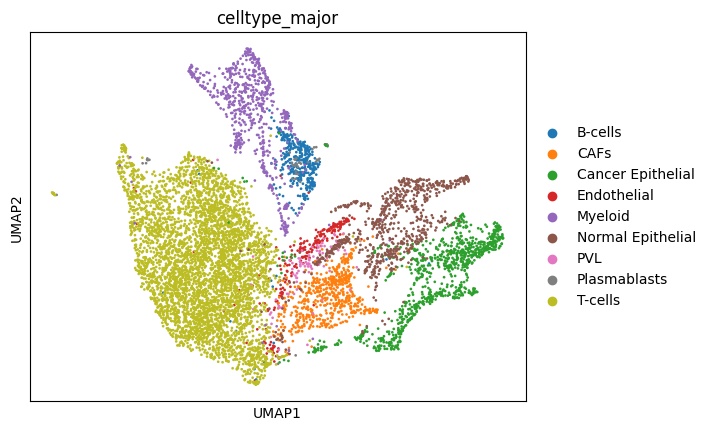

In [102]:
sc.pl.umap(adata_count_matrix_t, color='celltype_major') # this checks out

/Users/nicholasdjedjos/miniconda3/envs/maxfuse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


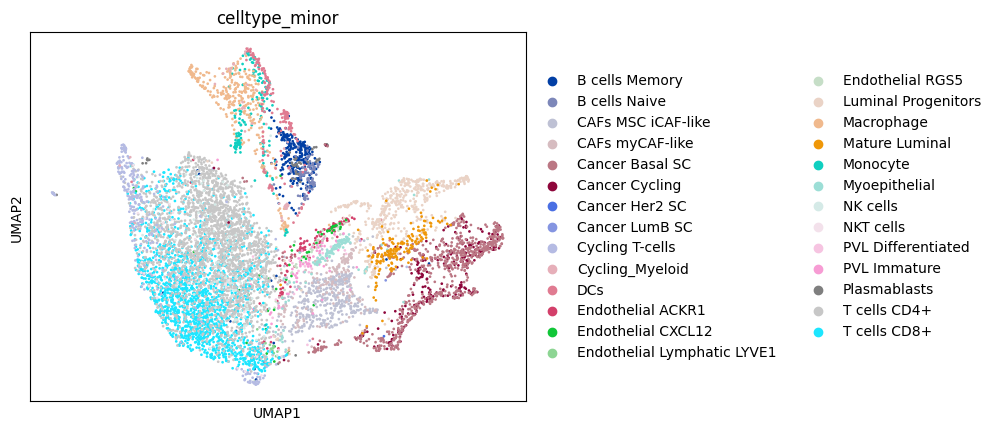

In [103]:
sc.pl.umap(adata_count_matrix_t, color ='celltype_minor')


/Users/nicholasdjedjos/miniconda3/envs/maxfuse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


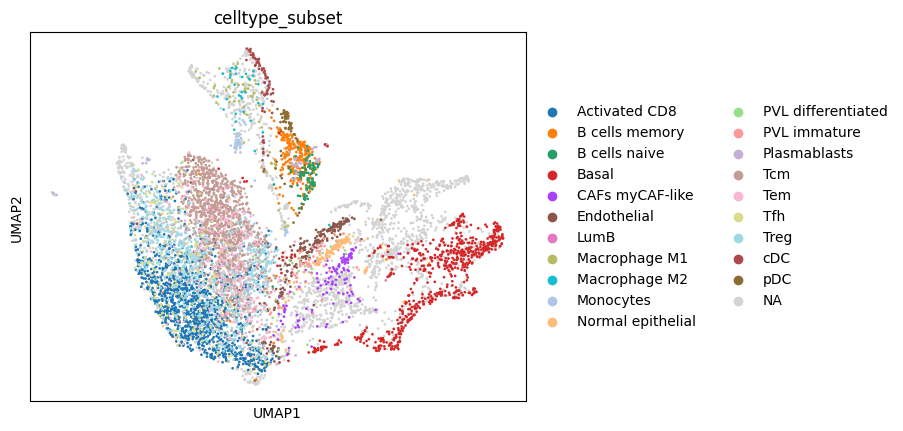

In [104]:
sc.pl.umap(adata_count_matrix_t, color ='celltype_subset')

/Users/nicholasdjedjos/miniconda3/envs/maxfuse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


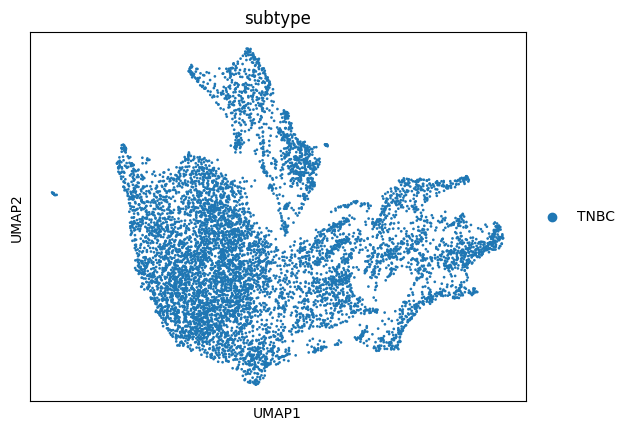

In [105]:
sc.pl.umap(adata_count_matrix_t, color ='subtype')

In [106]:
adata_count_matrix_t.obs['cn'] = -1

In [107]:
adata_count_matrix_t

AnnData object with n_obs × n_vars = 7986 × 29733
    obs: 'celltype_major', 'celltype_minor', 'celltype_subset', 'subtype', 'cn'
    uns: 'neighbors', 'umap', 'celltype_major_colors', 'celltype_minor_colors', 'celltype_subset_colors', 'subtype_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [108]:
# initializing adata_count_matrix_t obsm
# first find # of rows
rows = adata_count_matrix_t.n_obs
initialized_values = np.full((rows, 9), -1)


adata_count_matrix_t.obsm['cn_vector'] = initialized_values


In [109]:
adata_count_matrix_t.obsm['cn_vector']

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [110]:
celltype_major_set = set()
celltype_minor_set = set()
celltype_subset_set = set()
for title in adata_count_matrix_t.obs['celltype_major']:
    celltype_major_set.add(title)
for title in adata_count_matrix_t.obs['celltype_minor']:
    celltype_minor_set.add(title)
for title in adata_count_matrix_t.obs['celltype_subset']:
    celltype_subset_set.add(title)


In [111]:
B_cells_partition = adata_count_matrix_t[adata_count_matrix_t.obs['celltype_major'] == 'B-cells']
CAFs_cells_partition = adata_count_matrix_t[adata_count_matrix_t.obs['celltype_major'] == 'CAFs']
Cancer_Epithelial_partition = adata_count_matrix_t[adata_count_matrix_t.obs['celltype_major'] == 'Cancer Epithelial']
Endothelial_partition = adata_count_matrix_t[adata_count_matrix_t.obs['celltype_major'] == 'Endothelial']
Myeloid_partition = adata_count_matrix_t[adata_count_matrix_t.obs['celltype_major'] == 'Myeloid']
Normal_Epithelial_partition =adata_count_matrix_t[adata_count_matrix_t.obs['celltype_major'] == 'Normal Epithelial']
PVL_partition = adata_count_matrix_t[adata_count_matrix_t.obs['celltype_major'] == 'PVL']
Plasmablasts_partition = adata_count_matrix_t[adata_count_matrix_t.obs['celltype_major'] == 'Plasmablasts']
T_cells_partition = adata_count_matrix_t[adata_count_matrix_t.obs['celltype_major'] == 'T-cells']

In [112]:
# ignoring nan for now

# 1. create CN
# 2. choose random cell in CN
# 3. put it in as a count at a spot

In [113]:
cn_profile_order = sorted(list(adata_count_matrix_t.obs['celltype_major'].unique()), reverse=True)

In [114]:
print(cn_profile_order)

['T-cells', 'Plasmablasts', 'PVL', 'Normal Epithelial', 'Myeloid', 'Endothelial', 'Cancer Epithelial', 'CAFs', 'B-cells']


In [115]:
# creating CN profiles. each vector is a unique CN.
# ['T-cells', 'Plasmablasts', 'PVL', 'Normal Epithelial', 'Myeloid', 'Endothelial', 'Cancer Epithelial', 'CAFs', 'B-cells']
import numpy as np
import pandas as pd
import scanpy as sc

cn_profiles = [ # T Cells
                (1, 1, 0, 0, 0, 0, 0, 0, 0), # Activated CD8, Plasmoblasts
                (1 ,0, 1, 0, 0, 0, 0, 0, 0), # Tcm, PVL immature
                (1, 0, 0, 1, 0, 0, 0, 0, 0), # Treg, normal epithelial
                (1, 0, 0, 0, 1, 0, 0, 0, 0), # Tem, pdC
                (1, 0, 0, 0, 0, 1, 0, 0, 0), # Tfh, endothelial

                # skip plasmoblasts, as can also use the T-cell activated CD8
                # PVL
                (0 ,0, 1, 0, 0, 0, 1, 0, 0), # PVL differentiated, cancer_epithelial_basal

                # skip normal epithelial, can just use Treg

                # myeloid has a lot of subtypes
                (0, 0, 0, 0, 1, 0, 0, 1, 0), # cDC , CAFs myCAF-like
                (0, 0, 0, 0, 1, 0, 0, 0, 1), # Macrophage M1, B cells memory
                (0, 1, 0, 0, 1, 0, 0, 0, 0), # Monocytes, assigned to random plasmablast
                (0, 0, 1, 0, 1, 0, 0, 0, 0), # Macrophage M2, assigned to random PVL

                # skip Endothelial

                # cancer epithelial
                (0, 0, 0, 1, 0, 0, 1, 0, 0), # LumB, assigned to random normal epithelial

                # skip CAFs

                # B-cells
                (0, 0, 0, 0, 0, 1, 0, 0, 1), # B cells naive
                
                ] 
print(len(cn_profiles))
print(len(set(cn_profiles)))



12
12


In [116]:
# dictionary for mapping major cell type to cell type subset
# 

T_cells_dict = { (1, 1, 0, 0, 0, 0, 0, 0, 0) : 'Activated CD8',
                 (1 ,0, 1, 0, 0, 0, 0, 0, 0) : 'Tcm', 
                 (1, 0, 0, 1, 0, 0, 0, 0, 0) : 'Treg',
                 (1, 0, 0, 0, 1, 0, 0, 0, 0) : 'Tem', 
                 (1, 0, 0, 0, 0, 1, 0, 0, 0) : 'Tfh'
                }

Plasmablasts_dict = { (1, 1, 0, 0, 0, 0, 0, 0, 0) : 'Plasmablasts',
                      (0, 1, 0, 0, 1, 0, 0, 0, 0) : 'Plasmablasts'} # choosing a random plasmablast for monocyte

PVL_dict = {(1 ,0, 1, 0, 0, 0, 0, 0, 0) : 'PVL immature',
            (0 ,0, 1, 0, 0, 0, 1, 0, 0) : 'PVL differentiated',
            (0, 0, 1, 0, 1, 0, 0, 0, 0) : 'PVL random'} # basically choosing a random PVL for the next cell subtype

Normal_Epithelial_dict = {(1, 0, 0, 1, 0, 0, 0, 0, 0) : 'Normal epithelial',
                          (0, 0, 0, 1, 0, 0, 1, 0, 0) : 'Normal epithelial'} # choosing a random normal epithelial cell for LuMB

Myeloid_dict = { 
                (1, 0, 0, 0, 1, 0, 0, 0, 0) : "pDC",
                (0, 0, 0, 0, 1, 0, 0, 1, 0) : "cDC",
                (0, 0, 0, 0, 1, 0, 0, 0, 1) : "Macrophage M1",
                (0, 1, 0, 0, 1, 0, 0, 0, 0) : "Monocytes",
                (0, 0, 1, 0, 1, 0, 0, 0, 0) : "Macrophage M2"
                }

Endothelial_dict = {
                (1, 0, 0, 0, 0, 1, 0, 0, 0) : 'Endothelial',
                (0, 0, 0, 0, 0, 1, 0, 0, 1) : 'Endothelial' # choosing a random endothelial for B cells naive
                }

Cancer_Epithelial_dict = {(0 ,0, 1, 0, 0, 0, 1, 0, 0) : 'Basal',
                          (0, 0, 0, 1, 0, 0, 1, 0, 0) : 'LumB'}

CAFs_dict = {(0, 0, 0, 0, 1, 0, 0, 1, 0) : 'CAFs myCAF-like'}

B_cells_dict = {(0, 0, 0, 0, 1, 0, 0, 0, 1) : 'B cells memory',
                (0, 0, 0, 0, 0, 1, 0, 0, 1) : 'B cells naive'}


In [117]:
adata_count_matrix_t.obs

,celltype_major,celltype_minor,celltype_subset,subtype,cn
0,Endothelial,Endothelial ACKR1,Endothelial,TNBC,-1
1,Endothelial,Endothelial ACKR1,Endothelial,TNBC,-1
2,Endothelial,Endothelial ACKR1,Endothelial,TNBC,-1
3,Endothelial,Endothelial ACKR1,Endothelial,TNBC,-1
4,Endothelial,Endothelial ACKR1,Endothelial,TNBC,-1
...,...,...,...,...,...
7981,Normal Epithelial,Mature Luminal,NaN,TNBC,-1
7982,Normal Epithelial,Mature Luminal,NaN,TNBC,-1
7983,Normal Epithelial,Mature Luminal,NaN,TNBC,-1
7984,Normal Epithelial,Mature Luminal,NaN,TNBC,-1


In [118]:
# number of cells added 
cell_set = set()

In [119]:
# different sets for each subset
# not to add the same cell

def cell_sampler(cell_type: str, cell_type_dict: dict, choice: tuple):
        # print(choice)
        if choice not in cell_type_dict:
                print("entered a choice that isn't implemented yet")
                return "not implemented yet"
        if 'random' in cell_type_dict[choice]:
                rand_choice = np.random.randint(0,len(cell_type_dict.values()))
                # put stuff in a set, pop off
                rand_choice_value = (list(cell_type_dict.values())[rand_choice])
                if 'random' in rand_choice_value:
                        rand_choice = list(cell_type_dict.values())[0]
                else:
                        rand_choice = rand_choice_value
                sub_cluster = rand_choice
        else:
                sub_cluster = cell_type_dict[choice] 
 
        sub_cluster_cells = adata_count_matrix_t[adata_count_matrix_t.obs['celltype_subset'] == sub_cluster]
        possible_indices = sub_cluster_cells.obs.index.tolist()
        # sub_cluster_cells = pd.DataFrame(sub_cluster_cells.X.toarray())
        selected_index = np.random.choice(possible_indices)
        # while selected_index in cell_set:
        #         selected_index = np.random.choice(possible_indices)
        # length = len(possible_indices)
        # print(f"this is the length of sub_cluster_cells and I'm in this dict: {cell_type_dict}: {length}")
        # rand_choice = np.random.randint(length)
        # print(selected_index)
        cell_set.add(selected_index)
        # row_position = sub_cluster_cells.obs.index.get_loc(selected_index) # row position of the index in the subset I took
        # print(row_position)
        # print("before problem")
        # print(int(selected_index))
        # print(selected_index)
        # print(type(selected_index))
        adata_count_matrix_t.obsm['cn_vector'][int(selected_index)] = list(choice)  # choice is the cn
        
        return 0

        # cell_gene_profile = sub_cluster_cells.iloc[rand_choice,:]
        # return (sub_cluster, list(cell_gene_profile))
        # return (sub_cluster, list(cell_gene_profile), cell_type)
    

In [120]:
adata_count_matrix_t.obsm['cn_vector'][1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1])

In [149]:
# now, writing sampling algorithm
from collections import defaultdict
spots = defaultdict(list) # append every time, these are the cells chosen for each spot
cn_choice = []

for i in range(80000): # only want 10 spots
    random_choice = np.random.randint(0,len(cn_profiles)) # choosing a random CN
    # print(f"this is the random_choice at this cycle: {i}, {random_choice}" )
    choice = (cn_profiles[random_choice])

    # print(f"this is the choice in the major for loop: {choice}")
    # index is the cell type, cell_type_count is how many of that cell there is
    for cell_type_index,cell_type_count in enumerate(choice):
        # ['T-cells', 'Plasmablasts', 'PVL', 'Normal Epithelial', 'Myeloid', 'Endothelial', 'Cancer Epithelial', 'CAFs', 'B-cells']
        if cell_type_count == 0: # if there is 0 counts, we don't want to add any cells
            continue
        # all counts are just 1
        if cell_type_index == 0: # if cell type has a value and is first cell type (T cells in this case)
            cell_gene_profile = cell_sampler('T-cells', T_cells_dict, choice)
            # spots[i] += cell_gene_profile
        if cell_type_index == 1:
            cell_gene_profile = cell_sampler('Plasmablasts', Plasmablasts_dict, choice)
            # spots[i] += cell_gene_profile
        if cell_type_index == 2: 
            cell_gene_profile = cell_sampler('PVL', PVL_dict, choice)
            # spots[i] += cell_gene_profile
        if cell_type_index == 3:
            cell_gene_profile = cell_sampler('Normal Epithelial', Normal_Epithelial_dict, choice)
            # spots[i] += cell_gene_profile
        if cell_type_index == 4:
            cell_gene_profile = cell_sampler('Myeloid', Myeloid_dict, choice)
            # spots[i] += cell_gene_profile
        if cell_type_index == 5:
            cell_gene_profile = cell_sampler('Endothelial', Endothelial_dict, choice)
            # spots[i] += cell_gene_profile
        if cell_type_index == 6:
            cell_gene_profile = cell_sampler('Cancer Epithelial', Cancer_Epithelial_dict, choice)
            # spots[i] += cell_gene_profile
        if cell_type_index == 7:
            cell_gene_profile = cell_sampler('CAFs', CAFs_dict, choice)
            # spots[i] += cell_gene_profile
        if cell_type_index == 8:
            cell_gene_profile = cell_sampler('B-cells', B_cells_dict, choice)
            # spots[i] += cell_gene_profile


   


        
    


In [150]:
print(len(cell_set))

5335


In [ ]:
pri

In [148]:
# adata_count_matrix_t.obsm['cn_vector'][79] = (1,1,1,1,1,1,1,1,1)
cn_vector_df = pd.DataFrame(adata_count_matrix_t.obsm['cn_vector'])
# pd.DataFrame(adata_count_matrix_t.obsm['cn_vector']) == [0,  1,   0,  0,  0,  0,   0]
# cn_vector_df == [0,1,0,]
# cn_vector_df[cn_vector_df ==  [0,0, 0,   1,   0,   0,   0,   0,   0]]

,0,1,2,3,4,5,6,7,8
0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0
1,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0
2,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0
4,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
exclude = [-1,-1,-1,-1,-1,-1,-1,-1,-1]
mask = ~(adata_count_matrix_t.obsm['cn_vector'] == exclude).all(axis=1)

adata_count_matrix_t_cn = adata_count_matrix_t[mask]


In [165]:
adata_count_matrix_t_cn.obsm['cn_vector']

ArrayView([[1, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 1],
           [1, 0, 0, ..., 0, 0, 0],
           ...,
           [1, 0, 0, ..., 0, 0, 0],
           [1, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 1, 0, 0]])

In [166]:
cn_profiles_dict = { # T Cells
                (1, 1, 0, 0, 0, 0, 0, 0, 0) : 1, # Activated CD8, Plasmoblasts
                (1 ,0, 1, 0, 0, 0, 0, 0, 0) : 2, # Tcm, PVL immature
                (1, 0, 0, 1, 0, 0, 0, 0, 0) : 3, # Treg, normal epithelial
                (1, 0, 0, 0, 1, 0, 0, 0, 0) : 4, # Tem, pdC
                (1, 0, 0, 0, 0, 1, 0, 0, 0) : 5, # Tfh, endothelial

                # skip plasmoblasts, as can also use the T-cell activated CD8
                # PVL
                (0 ,0, 1, 0, 0, 0, 1, 0, 0) : 6, # PVL differentiated, cancer_epithelial_basal

                # skip normal epithelial, can just use Treg

                # myeloid has a lot of subtypes
                (0, 0, 0, 0, 1, 0, 0, 1, 0) : 7, # cDC , CAFs myCAF-like
                (0, 0, 0, 0, 1, 0, 0, 0, 1) : 8, # Macrophage M1, B cells memory
                (0, 1, 0, 0, 1, 0, 0, 0, 0) : 9, # Monocytes, assigned to random plasmablast
                (0, 0, 1, 0, 1, 0, 0, 0, 0) : 10, # Macrophage M2, assigned to random PVL

                # skip Endothelial

                # cancer epithelial
                (0, 0, 0, 1, 0, 0, 1, 0, 0) : 11, # LumB, assigned to random normal epithelial

                # skip CAFs

                # B-cells
                (0, 0, 0, 0, 0, 1, 0, 0, 1) : 12, # B cells naive
                
            }

In [172]:
obs_arr = []
# cn_profiles_dict[(0, 0, 0, 0, 0, 1, 0, 0, 1)]
for arr in adata_count_matrix_t_cn.obsm['cn_vector']:
    # print(type(arr))
    # print(type(tuple(arr)))
    # break
    obs_arr.append(cn_profiles_dict[tuple(arr)])

In [175]:
adata_count_matrix_t_cn.obs['cn_vector_int'] = obs_arr

/var/folders/gt/1c8d4lks1vgbghz7rr9vnqzm0000gn/T/ipykernel_3836/3420911186.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_count_matrix_t_cn.obs['cn_vector_int'] = obs_arr


In [180]:
adata_count_matrix_t_cn

AnnData object with n_obs × n_vars = 5335 × 29733
    obs: 'celltype_major', 'celltype_minor', 'celltype_subset', 'subtype', 'cn', 'cn_vector_int'
    uns: 'neighbors', 'umap', 'celltype_major_colors', 'celltype_minor_colors', 'celltype_subset_colors', 'subtype_colors'
    obsm: 'X_pca', 'X_umap', 'cn_vector'
    obsp: 'distances', 'connectivities'

/Users/nicholasdjedjos/miniconda3/envs/maxfuse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


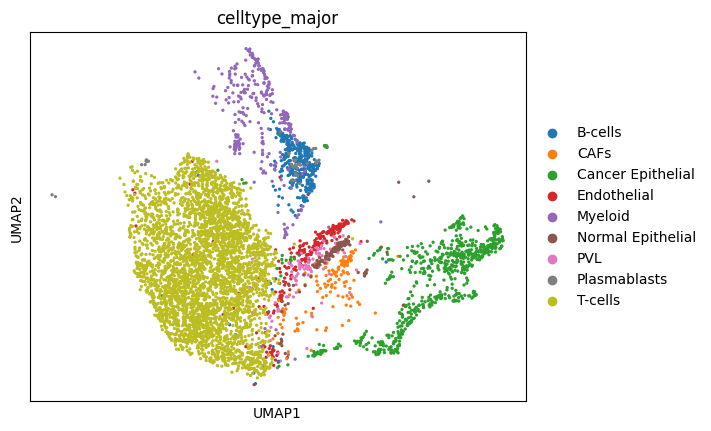

In [181]:
sc.pl.umap(adata_count_matrix_t_cn, color='celltype_major')

In [194]:
adata_count_matrix_t_cn_t_cell = adata_count_matrix_t_cn[adata_count_matrix_t_cn.obs['celltype_major'] == 'T-cells']

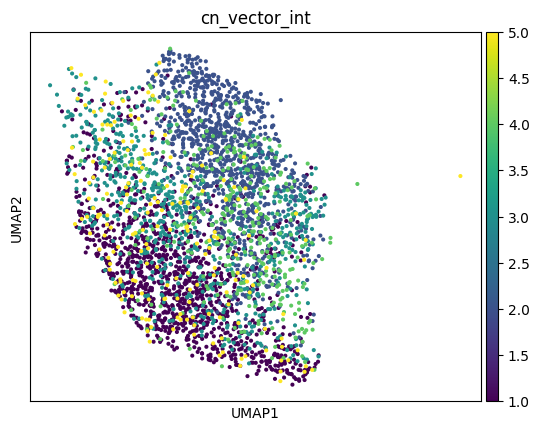

In [187]:
sc.pl.umap(adata_count_matrix_t_cn_t_cell,color='cn_vector_int')

In [192]:
adata_count_matrix_t_cn_t_cell

AnnData object with n_obs × n_vars = 3426 × 29733
    obs: 'celltype_major', 'celltype_minor', 'celltype_subset', 'subtype', 'cn', 'cn_vector_int'
    uns: 'neighbors', 'umap', 'celltype_major_colors', 'celltype_minor_colors', 'celltype_subset_colors', 'subtype_colors'
    obsm: 'X_pca', 'X_umap', 'cn_vector'
    obsp: 'distances', 'connectivities'

/Users/nicholasdjedjos/miniconda3/envs/maxfuse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


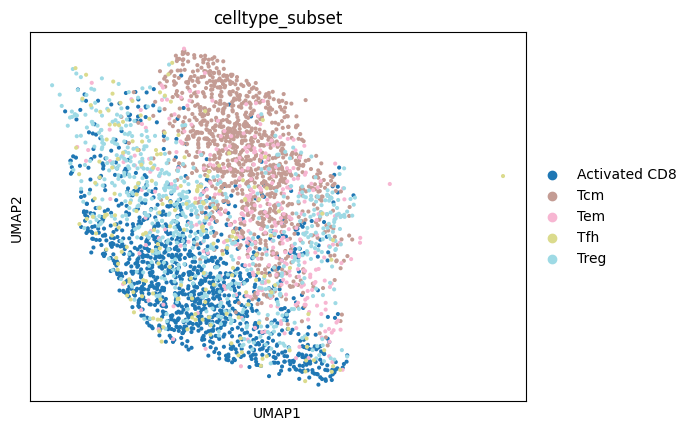

In [195]:
sc.pl.umap(adata_count_matrix_t_cn_t_cell, color = 'celltype_subset' )

In [188]:
sc.tl.umap(adata_count_matrix_t_cn_t_cell)

/Users/nicholasdjedjos/miniconda3/envs/maxfuse/lib/python3.8/site-packages/scanpy/tools/_umap.py:165: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['umap'] = {'params': {'a': a, 'b': b}}


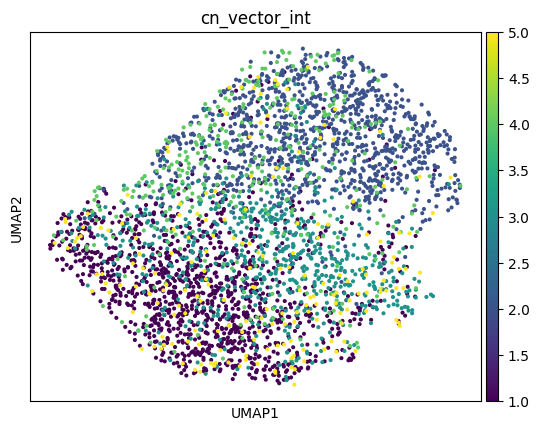

In [191]:
sc.pl.umap(adata_count_matrix_t_cn_t_cell, color='cn_vector_int')

In [179]:
adata_count_matrix_t_cn.write("adata_cn.h5ad")

### NOTE:  I'm not using every cell neighborhood here; just the onest that are defined in two cell type subset dictionaries. this is limiting because some cells don't have CNs that are defined across two cell types

In [98]:
cell_gene = []
for spot in spots.values():
    cell_gene.append(spot)


In [99]:
final_spots = []
for val in spots.values():
    if len(val) == 21: # length should be 4 (2 cells each) if it's 21 that means not implemented
        continue
    # print(val)
    final_spots.append(val)
print(len(final_spots))

100


### this is how many actual spots we have. the length of the next df will be double because I am including all the cells in each spot, and each spot has exactly two cells

In [67]:
for i in final_spots:
    print(len(i))

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


In [100]:
df_dict = dict()
for spot_number, tuple_ in enumerate(final_spots):
    for val in tuple_:
        df_dict[tuple_[0] + f' {spot_number}'] = tuple_[1] # only two cells per spot right now
        df_dict[tuple_[2] + f' {spot_number}'] = tuple_[3]


    


In [101]:
print(len(df_dict))

200


### the number after the cell subset is the spot. as you can see, two cell types per spot (which is also a CN)

In [102]:
spots_df = pd.DataFrame(df_dict)
spots_df.head()

,Tcm 0,PVL immature 0,Normal epithelial 1,LumB 1,Tfh 2,Endothelial 2,Activated CD8 3,Plasmablasts 3,PVL immature 4,Macrophage M2 4,...,Tfh 95,Endothelial 95,Normal epithelial 96,LumB 96,Activated CD8 97,Plasmablasts 97,cDC 98,CAFs myCAF-like 98,Endothelial 99,B cells naive 99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
spots_df.columns

Index(['Activated CD8 0', 'Plasmablasts 0', 'Activated CD8 1',
       'Plasmablasts 1', 'Activated CD8 2', 'Plasmablasts 2', 'Treg 3',
       'Normal epithelial 3', 'Activated CD8 4', 'Plasmablasts 4',
       ...
       'cDC 71', 'CAFs myCAF-like 71', 'Tfh 72', 'Endothelial 72',
       'Macrophage M1 73', 'B cells memory 73', 'PVL differentiated 74',
       'Basal 74', 'cDC 75', 'CAFs myCAF-like 75'],
      dtype='object', length=152)

### Miscellaneous

In [58]:
cols = []
values = []
major_cell_type = []
for tuple in cell_gene:
    cols.append(tuple[0])
    values.append(tuple[1])
    major_cell_type.append(tuple[2])

In [59]:
spot_dict = dict()
for idx, cell_type in enumerate(cols):
    spot_dict[cell_type + f" {idx}"] = values[idx]


In [60]:
spot_dict_df = pd.DataFrame(spot_dict)
# this is weird, should be multiple cells in a spot

In [61]:
# need to add cell type and the CN
spot_dict_df.loc["major_cell_type"] = major_cell_type

In [63]:
spot_dict_df.columns

Index(['Macrophage M1 0', 'n 1', 'Tfh 2', 'n 3', 'Tem 4', 'n 5', 'Tfh 6',
       'cDC 7', 'Tem 8', 'cDC 9', 'n 10', 'n 11', 'PVL differentiated 12',
       'n 13', 'n 14', 'n 15', 'Tfh 16', 'Macrophage M1 17', 'Tcm 18',
       'Activated CD8 19', 'n 20', 'n 21', 'Macrophage M1 22', 'n 23',
       'Tcm 24', 'Tem 25', 'n 26', 'Tfh 27', 'Tfh 28', 'PVL differentiated 29',
       'n 30', 'n 31', 'Tcm 32', 'Tcm 33', 'n 34', 'Treg 35', 'n 36',
       'Macrophage M1 37', 'n 38', 'n 39', 'Macrophage M1 40', 'n 41',
       'Treg 42', 'Activated CD8 43', 'n 44', 'Tem 45', 'Tfh 46', 'Tfh 47',
       'n 48', 'n 49', 'n 50', 'Activated CD8 51', 'n 52', 'Tfh 53', 'Treg 54',
       'Tcm 55', 'Tem 56', 'PVL differentiated 57', 'Tfh 58', 'n 59', 'cDC 60',
       'Tem 61', 'Activated CD8 62', 'Tem 63', 'Tem 64', 'n 65', 'Treg 66',
       'Tem 67', 'n 68', 'n 69', 'Macrophage M1 70', 'Treg 71',
       'Macrophage M1 72', 'Tcm 73', 'PVL differentiated 74', 'n 75',
       'PVL differentiated 76', 'Tem 77', 